# Credit Card Fraud (using ensemble learning: voating)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from time import perf_counter
from time import process_time
# Import functions created for this course
import timeit

In [2]:
df = pd.read_csv('/kaggle/input/credit-card-6/creditcard.csv') 
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
target = 'Class'

In [4]:
X = df.loc[:, df.columns!=target]
Y = df.loc[:, df.columns==target]

Class
0    284315
1       492
Name: count, dtype: int64


Class
0    227451
1       394
Name: count, dtype: int64

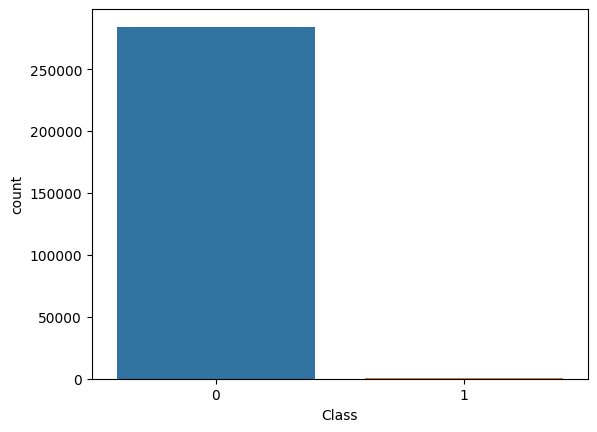

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.20,random_state=42)


ax = sns.countplot(x=target, data=df)
print(df[target].value_counts())
y_train[target].value_counts()

In [6]:
sm = SMOTE(random_state=12, sampling_strategy=1.0)
x_train_res, y_train_res = sm.fit_resample(X_train, y_train)
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count
X_train=x_train_res
y_train=y_train_res

In [7]:
'''X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.40, 
                                                    random_state=42)'''

'X_train, X_test, y_train, y_test = train_test_split(X, Y, \n                                                    test_size=0.40, \n                                                    random_state=42)'

In [8]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass
    
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [9]:
#y_train[target].value_counts()

In [10]:
#df

# SMOTE

In [11]:
#ax = sns.countplot(x=target, data=df)
#print(df[target].value_counts())

In [12]:
#plt.figure(figsize=(3,4))
#ax = sns.countplot(x='Class',data=df)
#for i in ax.containers:
 #   ax.bar_label(i,)

In [13]:
'''import plotly.express as px
labels=["Valid transactions ","Fraud transactions "]

fraud_or_not = df["Class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=df['Class'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["BLUE","black"]
             ,title="Fraud vs valid transactions")
fig.show()'''

'import plotly.express as px\nlabels=["Valid transactions ","Fraud transactions "]\n\nfraud_or_not = df["Class"].value_counts().tolist()\nvalues = [fraud_or_not[0], fraud_or_not[1]]\n\nfig = px.pie(values=df[\'Class\'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["BLUE","black"]\n             ,title="Fraud vs valid transactions")\nfig.show()'

In [14]:
'''sm = SMOTE(random_state=12, sampling_strategy=1.0)
x_train_res, y_train_res = sm.fit_resample(X_train, Y_train)
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count
X_train=x_train_res
Y_train=y_train_res'''

'sm = SMOTE(random_state=12, sampling_strategy=1.0)\nx_train_res, y_train_res = sm.fit_resample(X_train, Y_train)\nunique, count = np.unique(y_train_res, return_counts=True)\ny_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}\ny_train_smote_value_count\nX_train=x_train_res\nY_train=y_train_res'

In [15]:
'''unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count'''

'unique, count = np.unique(y_train_res, return_counts=True)\ny_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}\ny_train_smote_value_count'

In [16]:
#X_train=x_train_res
#y_train=y_train_res

In [17]:
#print(X.shape)
#print(Y.shape)

# Voting Classifiers :

In [18]:
'''from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.4, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split( X_train_val, y_train_val, test_size=0.4, random_state=42)
print(X.shape)
print(Y.shape)'''

'from sklearn.model_selection import train_test_split\n\nX_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.4, random_state=42)\n#X_train, X_val, y_train, y_val = train_test_split( X_train_val, y_train_val, test_size=0.4, random_state=42)\nprint(X.shape)\nprint(Y.shape)'

# Hyperparameter for Decision Tree

In [19]:
logModel = LogisticRegression()
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet'],
    #'C' : np.logspace(-4, 4),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [20]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
#best_clf = clf.fit(X_train,y_train)

In [21]:
#best_clf.best_estimator_

In [22]:
#print (f'Accuracy - : {best_clf.score(X,y):.3f}')

In [23]:
#grid_search.fit(X_train, y_train)

In [24]:
#grid_search.best_estimator_

In [25]:
#dt_best = grid_search.best_estimator_

In [26]:
X_train.shape

(454902, 30)

In [27]:
# Train Random Forest classifier, Extra-Trees classifier, SVM and MLP

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
classify_ = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf= 6, min_samples_split= 3)

random_forest_clf = RandomForestClassifier(n_jobs=4, 
                             random_state=2018,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)
extra_trees_clf = ExtraTreesClassifier(n_estimators=10, random_state=42)
svm_clf =SVC()
mlp_clf = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)
lr_clf=LogisticRegression(random_state=42)
knn_clf=KNeighborsClassifier(n_neighbors= 9,metric='manhattan',weights='uniform')
kb_clf=BernoulliNB(binarize=0.0)
estimators = [random_forest_clf,extra_trees_clf,classify_,mlp_clf]
for estimator in estimators:
    start_time = perf_counter()
    estimator.fit(X_train, y_train)
    end_time = perf_counter()
    elapsed_time = end_time - start_time

    print("Elapsed time : ",elapsed_time)
    

/tmp/ipykernel_42/61355352.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train)


Elapsed time :  242.36145075099998


/tmp/ipykernel_42/61355352.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train)


Elapsed time :  12.01229019599998
Elapsed time :  32.63768960899995


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Elapsed time :  1145.2880260739998


In [28]:
# .score() method directly calls sklearn.metrics.accuracy_score method.

[estimator.score(X_test, y_test) for estimator in estimators]

[0.9995259997893332,
 0.9995611109160493,
 0.9907657736736772,
 0.9971911098627155]

In [29]:
# Combine the classifiers into an ensemble that outperforms them all on the validation set, using a soft or hard voting classifier.

from sklearn.ensemble import VotingClassifier

named_estimators = [ ("random_forest_clf", random_forest_clf),("extra tree ",extra_trees_clf), ("decision tree", classify_),("ann",mlp_clf)] #,("lr_clf",lr_clf),("knn_clf",knn_clf),("kb_clf",kb_clf)

In [30]:
voting_clf = VotingClassifier(named_estimators,voting ='hard')

In [31]:
start_time =timeit.default_timer()
voting_clf.fit(X_train, y_train)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time
print('elapsed time',elapsed_time)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


elapsed time 1615.776740301


In [32]:
x_test_prediction=voting_clf.predict(X_test)
x_train_prediction = voting_clf.predict(X_train)
training_data_accuracy = accuracy_score(x_test_prediction , y_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)

Accuracy score on Test data : 0.9995084442259752


In [33]:
X_test.shape

(56962, 30)

In [34]:
print(generate_model_report(y_test, x_test_prediction))
print(confusion_matrix(y_test, x_test_prediction))

Accuracy =  0.9995084442259752
Precision =  0.8723404255319149
Recall =  0.8367346938775511
F1 Score =  0.8541666666666667
None
[[56852    12]
 [   16    82]]


[[56852    16]
 [   12    82]]


<Axes: >

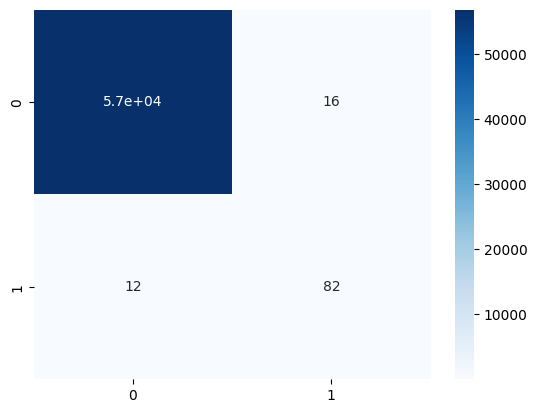

In [35]:
x_test_prediction = voting_clf.predict(X_test)
cf_matrix=confusion_matrix(x_test_prediction,y_test)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

[[56852    16]
 [   12    82]]


<Axes: >

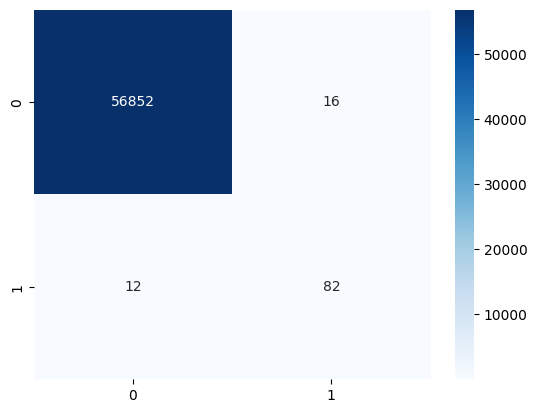

In [36]:
x_test_prediction = voting_clf.predict(X_test)
cf_matrix=confusion_matrix(x_test_prediction,y_test)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="g")

In [37]:
    y_pred_proba_dt = classify_.predict_proba(X_test)[:, 1]
    fpr_dt, tpr_dt, thresholds = roc_curve(Y_test,  y_pred_proba_dt)
    auc_dt = roc_auc_score(Y_test, y_pred_proba_dt)
    
    plt.figure(figsize=(5, 5), dpi=100)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.plot(fpr_dt,tpr_dt,linestyle='solid',label="Decisiontree ="+str(auc_dt))

NameError: name 'Y_test' is not defined

In [ ]:
voting_clf.score(X_train, y_train)


In [ ]:
[estimator.score(X_train, y_train) for estimator in voting_clf.estimators_]

In [ ]:
# remove an estimator by setting it to None using set_params()

#voting_clf.set_params(kb_clf=None)

In [ ]:
# Updated list of estimators

#voting_clf.estimators

In [ ]:
# Updated list of trained estimators

#voting_clf.estimators_

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, x_test_prediction)

In [ ]:
# We can either fit the VotingClassifier again, or just remove the SVM from the list of trained estimators:

#del voting_clf.estimators_[6]

In [ ]:
# Recheck

voting_clf.estimators_

A bit better! SVM was hurting performance. Let's try using a soft voting classifier.

If all classifiers in the ensemble can estimate class probabilities (predict_proba()), we can set "voting = 'soft'" to predict the class with the highest class probability, averaged over all the individual classifiers. This is called soft voting. It often achieves higher performance than hard voting because it gives more weight to highly confident votes.

In [ ]:
# Set voting to "soft" or "hard"
#here use "hard"

voting_clf.voting = "hard"
voting_clf.score(X_train, y_train)

In [ ]:
# Test set

voting_clf.score(X_test, y_test)

In [ ]:
[estimator.score(X_test, y_test) for estimator in voting_clf.estimators_]

In [ ]:
for x in voting_clf.estimators_:
    print (x.score(X_test, y_test))

In [ ]:
for x in voting_clf.estimators_:
    x_test_prediction = x.predict(X_test)
    test_data_accuracy=accuracy_score(x_test_prediction,y_test)
    #print('Accuracy score on Test data :' ,test_data_accuracy)
    print(x,'========')
    generate_model_report(y_test, x_test_prediction)

In [ ]:
generate_model_report(y_test, x_test_prediction)

In [ ]:
x_test_prediction=voting_clf.predict(X_test)
training_data_accuracy = accuracy_score(x_train_prediction , y_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)

In [ ]:
generate_model_report(y_test, x_test_prediction)